# Titaic Data Analysis

- import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import cufflinks as cf
cf.go_offline()

- get the data

In [3]:
df = pd.read_csv("titanic_train.csv", index_col="PassengerId")

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- basic info about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- aggregate deatils of numeric colums

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- shape of DF

In [7]:
df.shape

(891, 11)

- index and columns 

In [8]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [9]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- Number of Not Null Rows in each Column

In [10]:
df.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

- Number of Null Rows in each Column

In [11]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Exploratory Data Analysis

**Visualizing Missing Data**

- use heatmap of df.isnull() to visualize null values

<AxesSubplot:ylabel='PassengerId'>

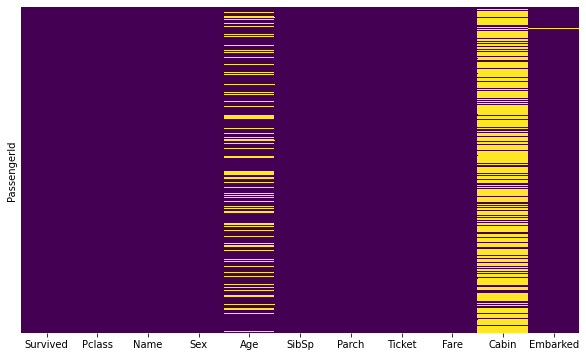

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.isnull(), yticklabels=False , cbar=False, cmap="viridis")

- Age column - values are missing in less numbers and can be replaced later by some reasonalbe value (imputation)
- Cabin column - almost 80% values are missing. Cabin value will either be dropped or be converted into a new feature like Cabin known - 0 or 1

- Survived count 

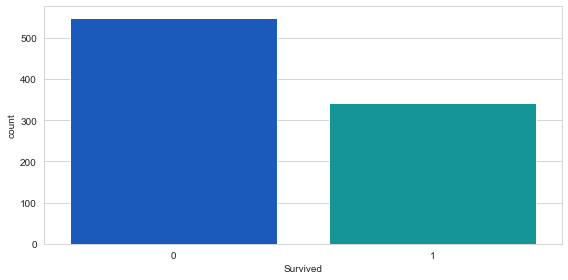

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,4))

sns.countplot(x=df["Survived"], palette="winter")

plt.tight_layout()

- Survived Count - by Sex

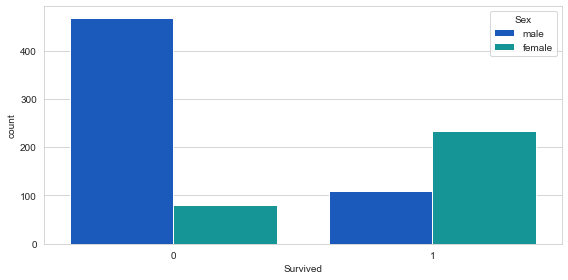

In [14]:
plt.figure(figsize=(8,4))

sns.countplot(x=df["Survived"], palette="winter", hue=df["Sex"])

plt.tight_layout()

- Survive Count - by Pclass

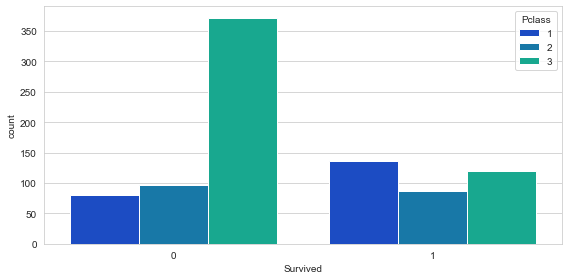

In [15]:
plt.figure(figsize=(8,4))

sns.countplot(x=df["Survived"], palette="winter", hue=df["Pclass"])

plt.tight_layout()

In [16]:
df.groupby("Pclass").count()[["Survived"]]

,Survived
Pclass,
1,216
2,184
3,491


In [17]:
# df.head(2)

- Age Distribution

<Figure size 864x288 with 0 Axes>

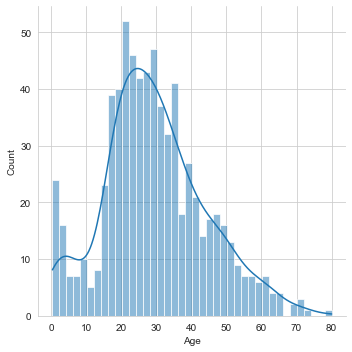

In [18]:
plt.figure(figsize=(12,4))

sns.displot(data=df["Age"] , bins=40 , kde=True)

plt.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='Count'>

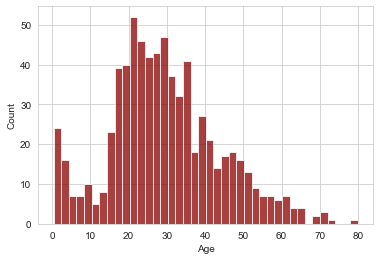

In [19]:
sns.histplot(data=df["Age"] , bins=40, color="darkred")

In [20]:
import cufflinks as cf
cf.go_offline()

In [21]:
df['Age'].iplot(kind='hist',bins=30,color='green')

- Count Plot of SibSbp and ParCh

<AxesSubplot:xlabel='SibSp', ylabel='count'>

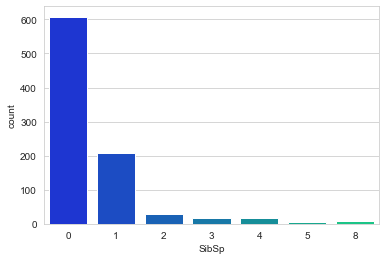

In [22]:
sns.countplot(x=df["SibSp"], palette="winter")

<AxesSubplot:xlabel='Parch', ylabel='count'>

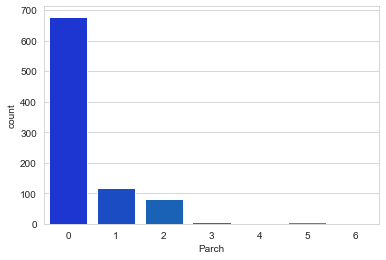

In [23]:
sns.countplot(x=df["Parch"], palette="winter")

- HistPlot of Fares

<AxesSubplot:xlabel='Fare', ylabel='Count'>

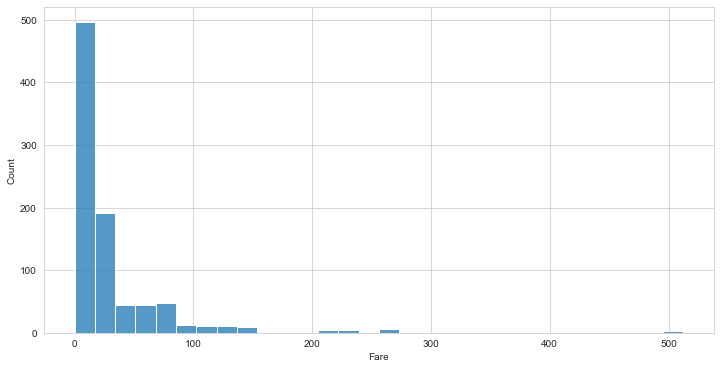

In [24]:
plt.figure(figsize=(12,6))

plt.tight_layout()

sns.histplot(data=df , x="Fare", bins=30)

**Cufflinks for plots**


In [25]:
import cufflinks as cf
cf.go_offline()

In [26]:
df['Fare'].iplot(kind='hist',bins=30,color='green')

## Data Cleaning

- Let's fill in the missing age data
- By imputing the empty values with Pclass wise median values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

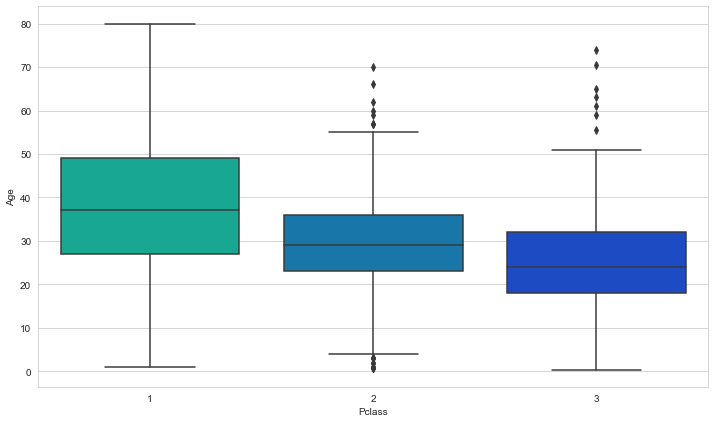

In [27]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x="Pclass" , y="Age" , palette="winter_r")

In [28]:
byPclass = df.groupby("Pclass")["Age"].median()

In [29]:
byPclass

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [30]:
Pclass_dict = byPclass.to_dict()

In [31]:
Pclass_dict

{1: 37.0, 2: 29.0, 3: 24.0}

In [32]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        return Pclass_dict[pclass]
    else:
        return age

In [33]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [34]:
df["Age"].isnull().sum()

0

In [35]:
df["Age"].notnull().sum()

891

- visualize null values using heatmap again

<AxesSubplot:ylabel='PassengerId'>

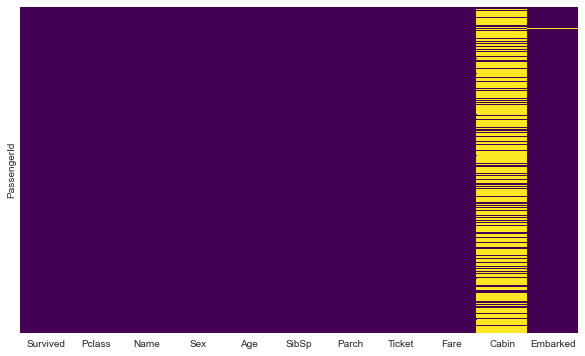

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.isnull(), yticklabels=False , cbar=False, cmap="viridis")

- lot of Cabin column values are missing. So drop the column.

In [37]:
df.drop("Cabin" , axis=1, inplace=True)

In [38]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


### Converting Categorical Features 

- We'll need to convert categorical features to dummy variables using pandas! 
- Otherwise our ML algo won't be able to directly take in those features as inputs.

- get Dummy Values for `Sex` and `Emmbarked` column

In [39]:
sex = pd.get_dummies(data=df["Sex"] , drop_first=True)

In [40]:
embarked = pd.get_dummies(data=df["Embarked"] , drop_first=True)

In [41]:
sex.head()

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1


In [42]:
embarked.head()

,Q,S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1


In [43]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


- drop text columns - not useful for ML algo (NLP later)

In [44]:
df.drop(["Name" , "Sex" , "Ticket", "Embarked"] , axis=1 , inplace=True)

In [45]:
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833


- conact the dummy value columns

In [46]:
df = pd.concat([df,sex,embarked] , axis=1)

In [47]:
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0


## Building Logistic Regression Model

**Train Test Split**

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], 
                                                    test_size=0.30, random_state=101)

**Training and Predicting**

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [52]:
y_pred = logmodel.predict(X_test)

**Model Evaluation**

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

